# Assignment3


TypeError: _request_autoscale_view() takes from 1 to 3 positional arguments but 4 were given

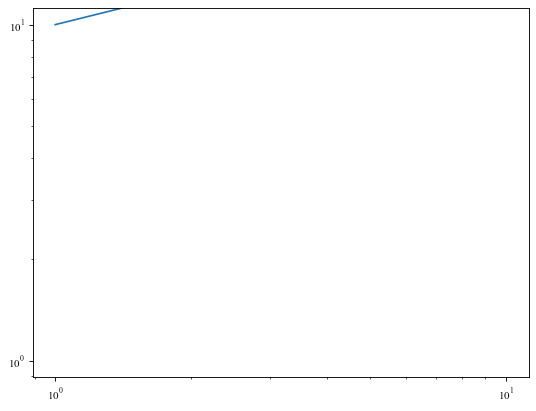

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from arrowline import *
fig = plt.figure(figsize=(8,6),dpi=80)
ax = fig.add_subplot(1,1,1)
arrowline(ax,np.array([1,1000]),np.array([10,100]),cosys='loglog')
arrowline(ax,np.array([2,1000]),np.array([10,1000]),cosys='loglog')


## Q1
Apprpximate the fixed points of each function. The Answer should be accurate to 12 decimal places.

In [ ]:

def fixed_point_root_finding(fun,x_,x_start,x_end):
    fig,ax = plt.subplots()
    ax.grid(True)
    x0 = x_start
    x1 = fun(x0)
    error = abs(x1-x0)
    counter = 0
    x_buffer = [x0]
    while error>1e-11:
        x1 = x0-0.01*(fun(x0)-x0)
        y0 = fun(x0)
        y1 = fun(x1)
        error = abs(x1-x0)
        if counter%10==0:
            ax.plot(np.array([x0,x0]),np.array([0,y0]),linestyle='-',color='b')
            # arrowline(ax,[x0,x1],[y0,y0],style='to_back',arrow_size=1.5,d_frac=0.5)
            # arrowline(ax,[x1,x1],[y0,y1],style='to_back',arrow_size=1.5,d_frac=0.5)
            ax.scatter(np.array([x0,x1]),np.array([y0,y1]),color='r')
        if counter%2==0:
            x_buffer.append(x1)
        x0 = x1
        counter +=1 
        if counter>1000:
            break
    
    x_ = np.linspace(min(x_buffer),max(x_buffer),1000)
    y_ = fun(x_)
    ax.plot(x_,y_)
    ax.plot(x_,x_)
    return x1,fun(x1),error

def fun1(x_):
    return x_**5-7*x_**3-2*x_**2+2

p,fp,error = fixed_point_root_finding(fun=fun1,x_=0,x_start=0.5,x_end=0.54)
print(p,fp,error)


